In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
data = pd.read_csv("50_Startups.csv",encoding = 'unicode_escape')
data.head(5)

,Spend_rnd,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Spend_rnd       50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.isnull().sum()
#nonull

Spend_rnd         0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

In [5]:
data.corr()
#correlation

,Spend_rnd,Administration,MarketingSpend,Profit
Spend_rnd,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
#model
import statsmodels.formula.api as smf  
model = smf.ols("Profit~Spend_rnd+Administration+MarketingSpend",data= data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           4.53e-30
Time:                        16:09:35   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Spend_rnd          0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
#here administration is insignificant
#lets remove it and see the r squared value
model0 = smf.ols("Profit~Spend_rnd+MarketingSpend",data= data).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           2.16e-31
Time:                        16:43:01   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
Spend_rnd          0.7966      0.041     19.266      0.000       0.713       0.880
MarketingSpend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
model1 = smf.ols("Profit~Spend_rnd+Administration",data= data).fit()
model1.summary()
#removing maketing

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           7.29e-31
Time:                        16:44:01   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
Spend_rnd          0.8621      0.030     28.589      0.000       0.801       0.923
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
## building on individual model
model2 = smf.ols("Profit~Administration",data= data).fit()
model2.summary()
## door is significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 07 Feb 2021   Prob (F-statistic):              0.162
Time:                        16:45:14   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model3 = smf.ols("Profit~MarketingSpend",data= data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           4.38e-10
Time:                        16:46:11   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MarketingSpend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

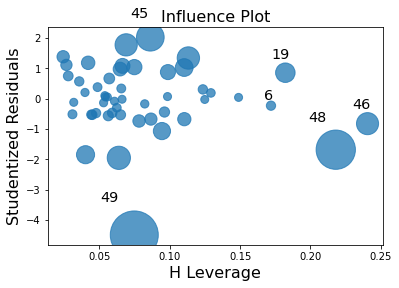

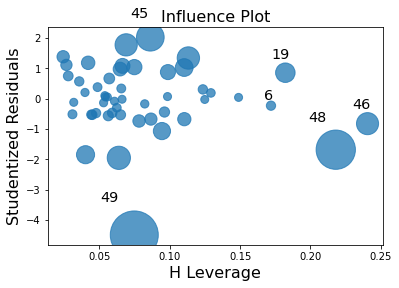

In [13]:
##plotting the influence plot
import statsmodels.api as sm
sm.graphics.influence_plot(model)

In [14]:
#lets remove the observation = 45
data1 = data.drop(data.index[[45]],axis=0)

In [16]:
#lets build model again
model4 = smf.ols(" Profit~Spend_rnd+MarketingSpend",data= data1).fit() 
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     467.7
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           2.69e-31
Time:                        16:48:52   Log-Likelihood:                -513.45
No. Observations:                  49   AIC:                             1033.
Df Residuals:                      46   BIC:                             1039.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.538e+04   2724.707     16.654      0.000    3.99e+04    5.09e+04
Spend_rnd          0.8026      0.040     19.976      0.000       0.722       0.884
MarketingSpend     0.0336      0.015      2.218      0.032       0.003       0.064
==============================================================================
Omnibus:                       14.947   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.493
Skew:                          -1.000   Prob(JB):                     3.55e-05
Kurtosis:                       5.457   Cond. No.                     5.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#lets remove the observation = 49
data2 = data.drop(data.index[[49]],axis=0)

In [21]:
model4 = smf.ols(" Profit~Spend_rnd+MarketingSpend+Administration",data= data2).fit() 
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           8.85e-32
Time:                        16:51:27   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
Spend_rnd          0.7830      0.038     20.470      0.000       0.706       0.860
MarketingSpend     0.0252      0.014      1.825      0.075      -0.003       0.053
Administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#lets remove the observation = 48
data3 = data.drop(data.index[[48]],axis=0)

In [25]:
model5 = smf.ols(" Profit~Spend_rnd+MarketingSpend ",data= data3).fit() 
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     423.6
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           2.36e-30
Time:                        16:54:23   Log-Likelihood:                -514.57
No. Observations:                  49   AIC:                             1035.
Df Residuals:                      46   BIC:                             1041.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.808e+04   2789.009     17.239      0.000    4.25e+04    5.37e+04
Spend_rnd          0.7924      0.041     19.280      0.000       0.710       0.875
MarketingSpend     0.0273      0.016      1.763      0.084      -0.004       0.059
==============================================================================
Omnibus:                       18.305   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.505
Skew:                          -1.093   Prob(JB):                     1.44e-07
Kurtosis:                       6.264   Cond. No.                     5.57e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# Making a data frame to check which model is the best


model_dict = {
    "Model": ["model","model0", "model1", "model2", "model3", "model4","model5"],
    
    "Model Info": ["A", "B", "C","D", "E","F","G"],
    
    "R-squared": [model.rsquared,model0.rsquared,model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared],
    
    "Adj rsquared": [model.rsquared_adj,model0.rsquared_adj,model1.rsquared_adj,model2.rsquared_adj,model3.rsquared_adj,model4.rsquared_adj,model5.rsquared_adj],
    
    "AIC": [model.aic,model0.aic,model1.aic,model2.aic,model3.aic, model4.aic,model5.aic]
            }

model_check = pd.DataFrame(model_dict)
model_check

,Model,Model Info,R-squared,Adj rsquared,AIC
0,model,A,0.950746,0.947534,1058.771499
1,model0,B,0.950450,0.948342,1057.070772
2,model1,C,0.947813,0.945592,1059.663693
3,model2,D,0.040287,0.020293,1203.253670
4,model3,E,0.559154,0.549969,1164.356792
5,model4,F,0.948495,0.946256,1035.131449
6,model5,G,0.948495,0.946256,1035.131449


In [31]:
#modelA is improved so it is considered to the final model (after removing influncers)